# Table of Contents
 <p><div class="lev1"><a href="#Read-Department-of-Education-School-District-Boundaries-file"><span class="toc-item-num">1&nbsp;&nbsp;</span>Read Department of Education School District Boundaries file</a></div><div class="lev1"><a href="#Read-geocoded-sales-house-data"><span class="toc-item-num">2&nbsp;&nbsp;</span>Read geocoded sales house data</a></div><div class="lev1"><a href="#Read-School-Attendance-Boundaries"><span class="toc-item-num">3&nbsp;&nbsp;</span>Read School Attendance Boundaries</a></div>

In [1]:
%matplotlib inline
%config InlineBackend.figure_format='retina'
# plt.rc("figure", autolayout=True)
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (8.0, 6.0)

In [2]:
import geopandas as gpd
import pandas as pd
import shapely
plot_dataframe = gpd.plotting.plot_dataframe
Point = shapely.geometry.Point

# Read Department of Education School District Boundaries file

In [3]:
tl_2013_55_unsd_elsd_harn = gpd.read_file("Milwaukee_data/tl_2013_55_unsd_elsd_harn/tl_2013_55_unsd_elsd_harn.shp")

A single row looks like this:

In [4]:
tl_2013_55_unsd_elsd_harn.ix[0]

ALAND                                               4.61654e+08
ATH_CO                                                Dairyland
ATH_CO_NO                                                    11
AWATER                                                   325618
CESA_NAME                           Cooperative Ed Serv Agcy 04
CESA_NUM                                                      4
DIST_CODE                                                   485
DIST_NAME                                          Blair-Taylor
ELSDLEA                                                    None
GEOID                                                   5500016
HIGRADE                                                      12
INTPTLAT                                            +44.2900855
INTPTLON                                           -091.1729095
LOGRADE                                                      PK
LSAD                                                         00
MTFCC                                   

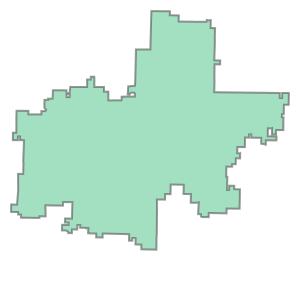

In [5]:
tl_2013_55_unsd_elsd_harn.ix[0,"geometry"]

And we can make a quick map very quickly like this:

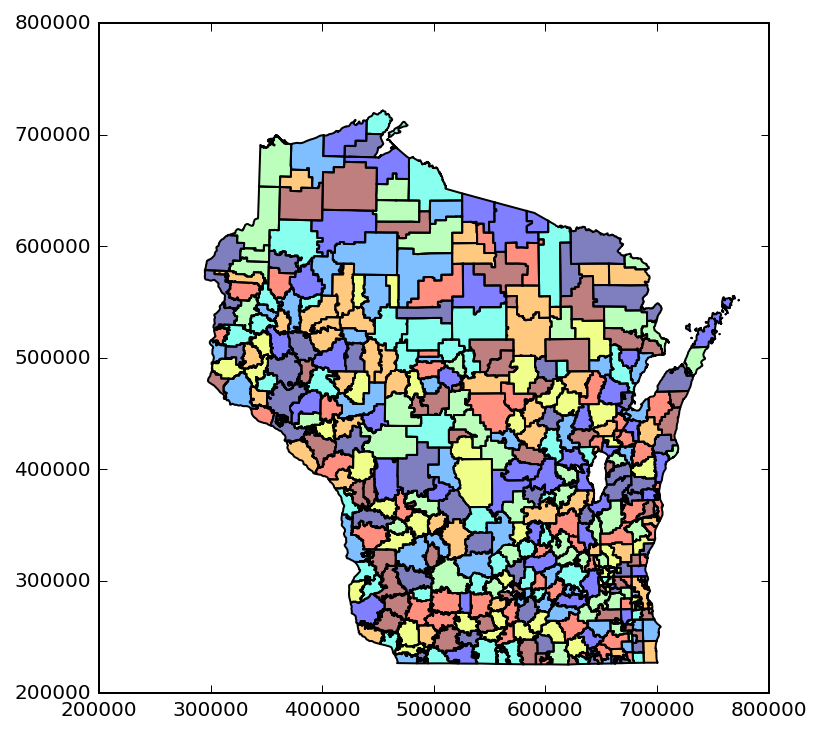

In [6]:
plot_dataframe(tl_2013_55_unsd_elsd_harn)

# Read geocoded sales house data

Import some house locations, and try to get them on that map.

In [13]:
import pyproj

In [65]:
geocoded_ls = []
crs = tl_2013_55_unsd_elsd_harn.crs
for year in (2014, 2015, 2016):
    for district in range(1,15+1):
        geocoded_pd=pd.read_csv("Milwaukee_data/geocoded/%d_RVS_Dist%d_geocoded.csv" % (year, district))
        geometry = gpd.GeoSeries([Point(xy) for xy in zip(geocoded_pd.lng, geocoded_pd.lat)], crs={"proj":"latlong", "datum":"WGS84"})
        geometry = geometry.to_crs(crs)
        n = len(geometry)
        geocoded_pd = gpd.GeoDataFrame(geocoded_pd, geometry=geometry)
        geocoded_pd["year"] = year
        geocoded_pd["district"] = district
        geocoded_ls.append(geocoded_pd)

In [49]:
geocoded_concat = pd.concat(geocoded_ls)

(270000.0, 305000.0)

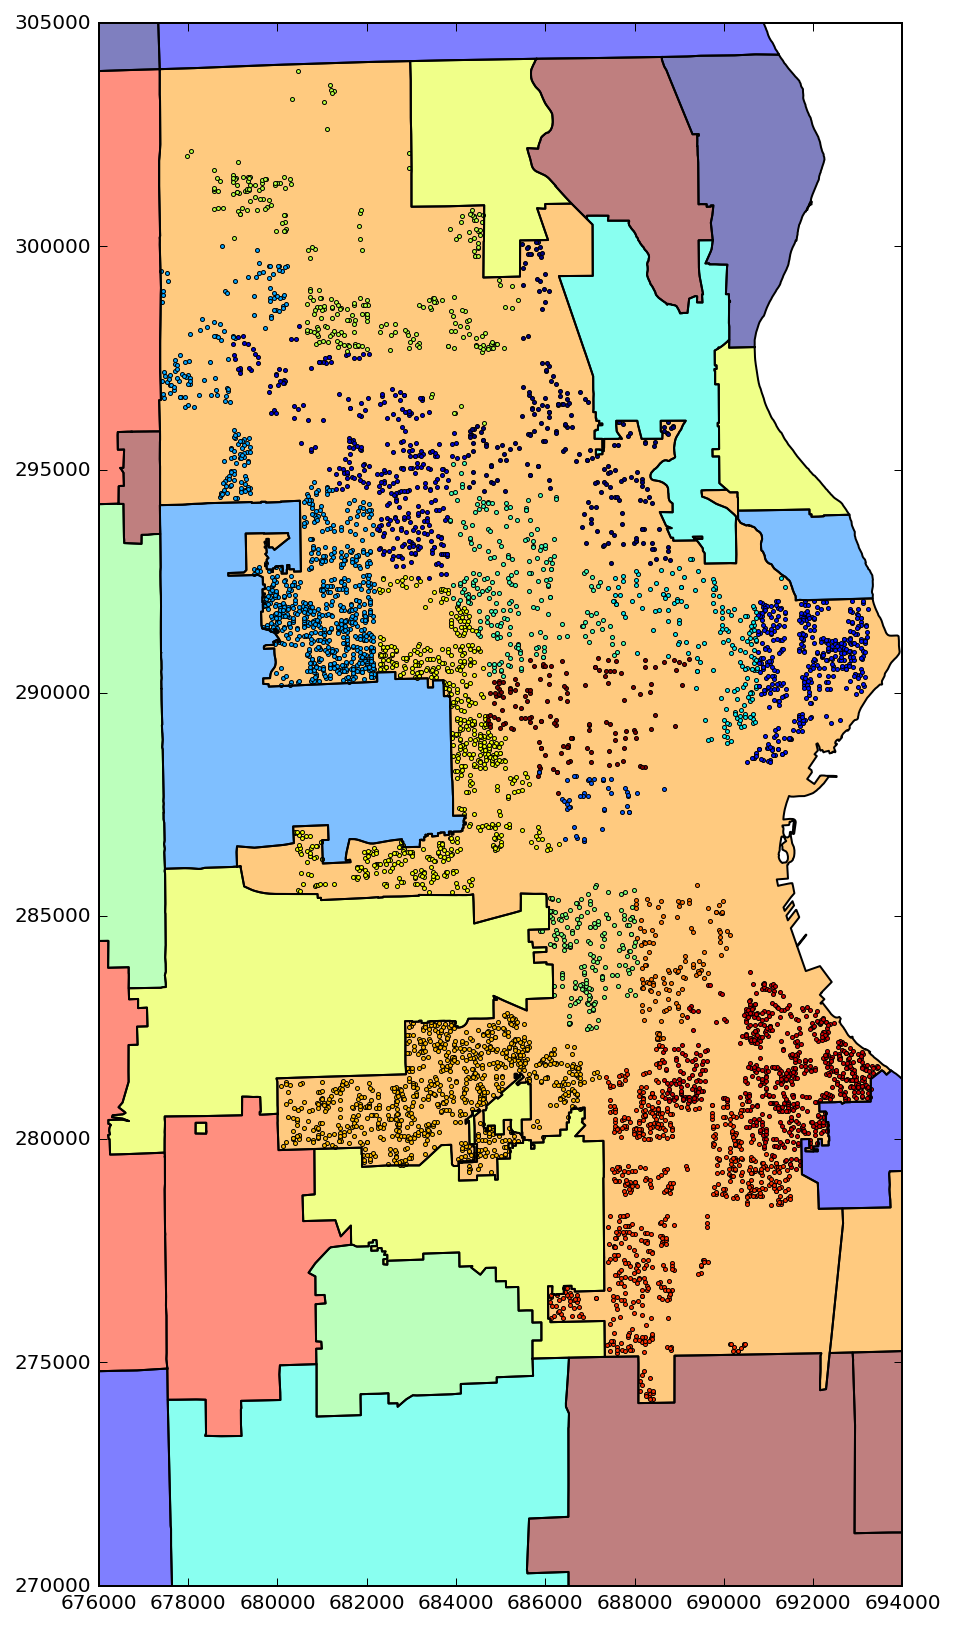

In [55]:
plt.rcParams['figure.figsize'] = (14.0, 14.0)
plot_dataframe(geocoded_concat, column="district", figsize=(14.0, 14.0))
ax=plt.gca()
old_xlim = plt.xlim()
old_ylim = plt.ylim()
plot_dataframe(tl_2013_55_unsd_elsd_harn, ax=ax)
plt.xlim(old_xlim)
plt.ylim(old_ylim)

# Read School Attendance Boundaries

In [57]:
SABS_1314 = gpd.read_file("Milwaukee_data/SAA1314/SABS_1314.dbf")

In [62]:
SABS_1314_WI=SABS_1314[SABS_1314.stAbbrev=="WI"]

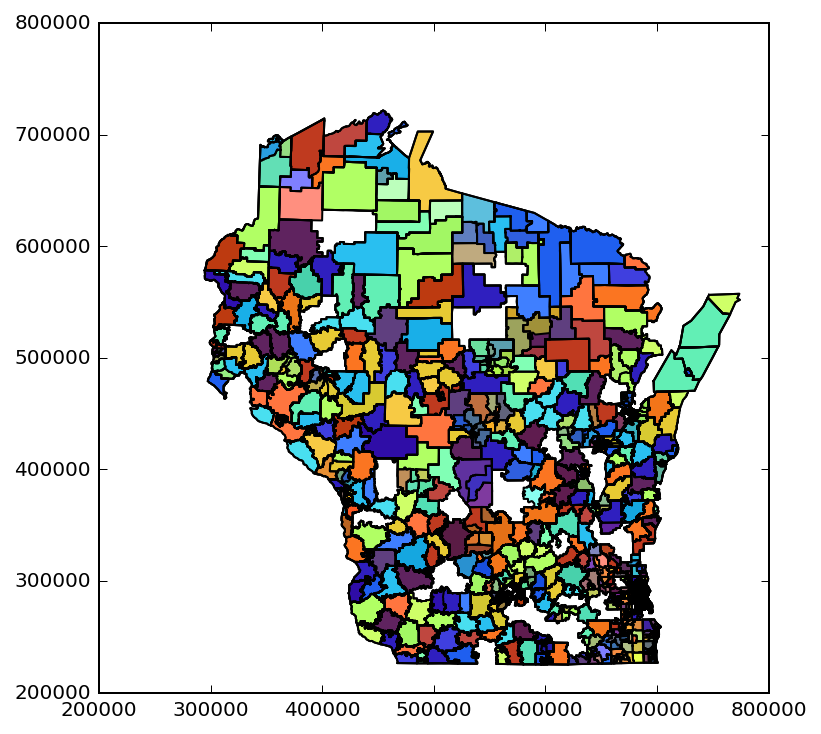

In [71]:
plt.rcParams['figure.figsize'] = (6.0, 6.0)
plot_dataframe(SABS_1314_WI.to_crs(crs))

(270000.0, 305000.0)

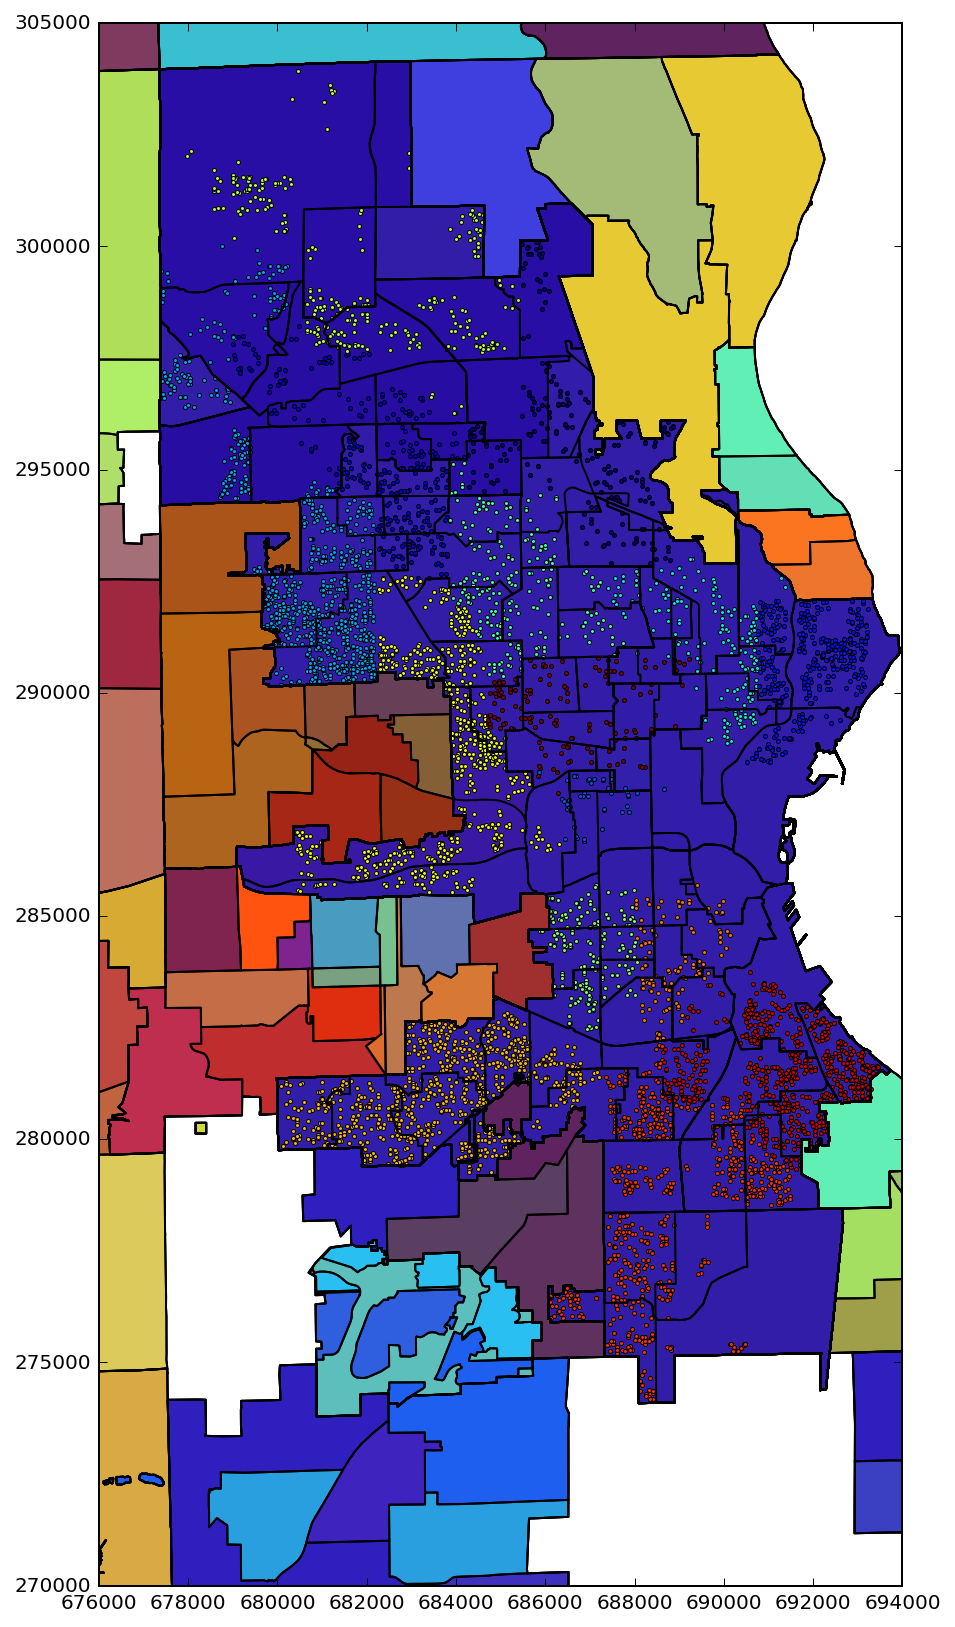

In [72]:
plt.rcParams['figure.figsize'] = (14.0, 14.0)
plot_dataframe(geocoded_concat, column="district", figsize=(14.0, 14.0))
ax=plt.gca()
old_xlim = plt.xlim()
old_ylim = plt.ylim()
plot_dataframe(SABS_1314_WI.to_crs(crs), ax=ax)
plt.xlim(old_xlim)
plt.ylim(old_ylim)